In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("apple_quality.csv", nrows=400)
display(df.head(2), df.sample(2), df.tail(2))

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809,good


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
223,223,-0.511164,-1.647559,2.070184,-3.127340,3.447141,-2.435723,1.182447,good
245,245,2.509374,-3.113597,-2.800004,2.152582,-1.289595,1.091546,-1.022114,good


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
398,398,0.780136,-1.562171,0.867887,3.279170,3.136770,0.853514,-0.117891,good
399,399,-1.037014,2.611287,-2.975672,0.409859,-0.583967,3.587747,4.405949,bad


In [15]:
df = df.drop(columns={"A_id"})
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [16]:
# Dataset Information
display(df.describe(),
pd.DataFrame({
    'feature': df.columns.values,
    'dtypes': [df[col].dtype for col in df.columns],
    'n_unique': df.nunique().values,
    'n_nan': [df[col].isna().sum() for col in df.columns],
    'n_dupe': [df.duplicated().sum() for row in df.columns],
    'sample_unique': [df[col].unique() for col in df.columns]
    })
)
print(f'''
      Total Columns that having missing value = {df.isnull().any().sum()}
      Total Columns that are clean            = {df.shape[1] - df.isnull().any().sum()}
      Total Rows that having missing value    = {df.isnull().sum().sum()}
      Total Rows                              = {df.shape[0]}
      Totol Percentage of missing value      = {(df.isnull().sum().sum()/np.product(df.shape)) * 100}
      ''')

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.564365,-1.004735,-0.430205,0.972296,0.650043,0.551777,0.292374
std,2.048663,1.534073,1.962900,1.523668,1.955560,1.993176,2.195753
min,-6.129668,-6.235107,-5.029716,-3.292343,-4.786379,-5.864599,-6.460989
25%,-2.110557,-2.030827,-1.733934,-0.111653,-0.689066,-0.672451,-1.403337
50%,-0.590392,-1.106041,-0.560745,0.945629,0.690460,0.631382,0.248145
75%,0.951110,-0.125534,0.883914,1.942342,2.034339,1.942203,1.923175
max,5.189624,5.149000,5.346330,7.619852,5.148739,6.346445,7.404736


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,Size,float64,400,0,0,"[-3.970048523, -1.195217191, -0.292023862, -0...."
1,Weight,float64,400,0,0,"[-2.512336381, -2.839256528, -1.351281995, -2...."
2,Sweetness,float64,400,0,0,"[5.346329613, 3.664058758, -1.738429162, 1.324..."
3,Crunchiness,float64,400,0,0,"[-1.012008712, 1.588232309, -0.342615928, -0.0..."
4,Juiciness,float64,400,0,0,"[1.844900361, 0.853285795, 2.838635512, 3.6379..."
5,Ripeness,float64,400,0,0,"[0.329839797, 0.867530082, -0.038033328, -3.41..."
6,Acidity,float64,400,0,0,"[-0.491590483, -0.722809367, 2.621636473, 0.79..."
7,Quality,object,2,0,0,"[good, bad]"



      Total Columns that having missing value = 0
      Total Columns that are clean            = 8
      Total Rows that having missing value    = 0
      Total Rows                              = 400
      Totol Percentage of missing value      = 0.0
      


In [17]:
# ReType
df["Acidity"] = df['Acidity'].astype(float)

In [18]:
# Outliers
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
def find_anomalies(data, column_name):
    q1, q3 = data.quantile([0.25, 0.75])
    iqr = q3 - q1
    limit = iqr * 1.5
    bot = q1 - limit
    top = q3 + limit
    outliers_count = ((data < (bot)) | (data > (top))).sum()

    result = pd.DataFrame({
        'Column': [column_name],
        'IQR': [iqr],
        'Lower Bound': [bot],
        'Upper Bound': [top],
        'Outliers': [outliers_count]
    })
    return result

df_outliers = pd.DataFrame(columns=['Column', 'IQR', 'Lower Bound', 'Upper Bound', 'Outliers'])

for column in numeric_columns:
    result = find_anomalies(df[column], column)
    df_outliers = pd.concat([df_outliers, result], ignore_index=True)
    
# Remove Outliers
for i,low,up in zip(df_outliers.Column.unique(),df_outliers["Lower Bound"].unique(),df_outliers["Upper Bound"].unique()):
    df = df[(df[i] >= low) & (df[i] <= up)]

display(df_outliers)
print(f"Numbers of Outliers Removed : {df_outliers['Outliers'].sum()}")

C:\Users\Utente\AppData\Local\Temp\ipykernel_4740\2631605100.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_outliers = pd.concat([df_outliers, result], ignore_index=True)


,Column,IQR,Lower Bound,Upper Bound,Outliers
0,Size,3.061667,-6.703057,5.543610,0
1,Weight,1.905293,-4.888767,2.732406,7
2,Sweetness,2.617848,-5.660705,4.810686,3
3,Crunchiness,2.053995,-3.192646,5.023335,4
4,Juiciness,2.723405,-4.774174,6.119447,1
5,Ripeness,2.614654,-4.594431,5.864183,7
6,Acidity,3.326511,-6.393104,6.912942,2


Numbers of Outliers Removed : 24


In [19]:
# Encode
df['Quality'] = df['Quality'].map({'bad': -1, 'good': 1})
df.sample(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
165,-0.348625,1.836154,-0.191223,3.549382,-0.850151,-3.651885,1.656621,-1
353,-0.847851,-1.182028,0.271405,0.582183,2.343851,-0.522942,2.145083,-1
11,2.450960,-0.564177,-1.635041,0.942400,-2.087317,1.214322,1.294324,1
321,-0.071526,-0.298655,-2.200539,1.683788,-1.506103,0.155930,-0.779829,-1
46,-0.487367,-0.768805,-0.779232,2.025257,1.477927,0.267788,-4.454570,1


### Single feature model

In [31]:
# Train Test Split
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
X = df.drop("Quality", axis=1)
X = pd.DataFrame(X["Size"])
y = df["Quality"]

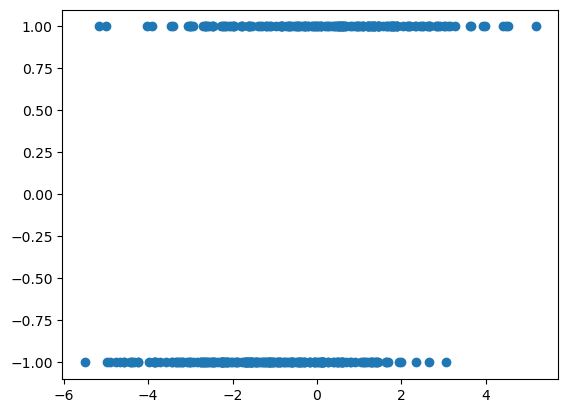

In [35]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"""
X_train = {X_train.shape}
X_test = {X_test.shape}""")


X_train = (302, 1)
X_test = (76, 1)


In [33]:
# Import model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6578947368421053


In [72]:
w_star = np.insert(lr.coef_, 1, np.array(lr.intercept_))
w_star

array([ 3.2224722 , -1.64376913])

In [79]:
X_train["Cost"] = np.ones(X_train.shape[0])
X_train.T

,137,101,314,300,223,352,198,75,219,94,...,214,121,377,20,188,71,106,270,348,102
Size,0.371477,0.401028,0.336362,0.306009,0.04784,0.281253,0.424573,0.468642,0.269416,0.367398,...,0.327211,0.67765,0.417498,0.563434,0.142469,0.692901,0.416121,0.330769,0.651975,0.61288
Cost,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


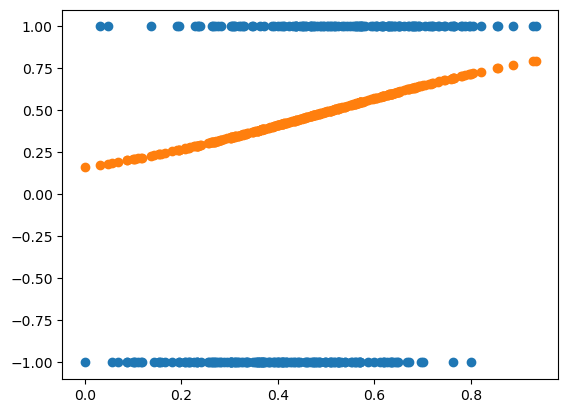

In [92]:
import matplotlib.pyplot as plt
plt.scatter(X_train["Size"].values, y_train.values)
plt.scatter(X_train["Size"].values, 1 / (1 + np.exp(- np.dot(w_star.T, X_train.values.T))))
plt.show()

In [ ]:
# Generate a neighbour point
eps = 0.1
w_bar = w_star + np.array([0.5,-0.5,0,0,0,-0.08,0.5,-0.7])
print(np.linalg.norm(w_star - w_bar))
print(w_bar)

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)